### FAULTY AIR QUALITY SENSOR CHALLENGE

#### VYRODOK TEAM
School: EDSA

- Eric Mbuthia
- Linda Kelida
- Teddy Waweru
- Jessica Njuguna

# 1. EDA Process

#### Import EDA Packages

In [204]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

#### Import Data

In [205]:
#A00
# Load Files
train_df = pd.read_csv('Challenge/data/train.csv', parse_dates=['Datetime'])
test_df = pd.read_csv('Challenge/data/test.csv', parse_dates=['Datetime'])
samp_df = pd.read_csv('Challenge/data/SampleSubmission.csv')

## Statistical Summaries

In [206]:
train_df.columns, test_df.columns, samp_df.columns

(Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
        'Relative_Humidity', 'Offset_fault'],
       dtype='object'),
 Index(['ID', 'Datetime', 'Sensor1_PM2.5', 'Sensor2_PM2.5', 'Temperature',
        'Relative_Humidity'],
       dtype='object'),
 Index(['ID', 'Offset_fault'], dtype='object'))

In [207]:
train_df.shape, test_df.shape, samp_df.shape, train_df.isna().sum(), test_df.isna().sum()

((297177, 7),
 (127361, 6),
 (127361, 2),
 ID                      0
 Datetime                0
 Sensor1_PM2.5        3614
 Sensor2_PM2.5        3614
 Temperature          3549
 Relative_Humidity    3549
 Offset_fault            0
 dtype: int64,
 ID                       0
 Datetime                 0
 Sensor1_PM2.5            0
 Sensor2_PM2.5            0
 Temperature          88090
 Relative_Humidity    88090
 dtype: int64)

In [208]:
train_df.info(), train_df.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297177 entries, 0 to 297176
Data columns (total 7 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 297177 non-null  object        
 1   Datetime           297177 non-null  datetime64[ns]
 2   Sensor1_PM2.5      293563 non-null  float64       
 3   Sensor2_PM2.5      293563 non-null  float64       
 4   Temperature        293628 non-null  float64       
 5   Relative_Humidity  293628 non-null  float64       
 6   Offset_fault       297177 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 15.9+ MB


(None,
 ID                           object
 Datetime             datetime64[ns]
 Sensor1_PM2.5               float64
 Sensor2_PM2.5               float64
 Temperature                 float64
 Relative_Humidity           float64
 Offset_fault                  int64
 dtype: object)

We convert the Datetime column to datetime format, & add columns for the year, month, day & hour

In [209]:
#A00
#Convert datetime format
train_df['Datetime'] = pd.to_datetime(train_df['Datetime'])

# Add columns for year, month, day, hour
train_df['YEAR'] = pd.DatetimeIndex(train_df['Datetime']).year
train_df['MONTH'] = pd.DatetimeIndex(train_df['Datetime']).month
train_df['DAY'] = pd.DatetimeIndex(train_df['Datetime']).day
train_df['HOUR'] = pd.DatetimeIndex(train_df['Datetime']).hour
train_df['DAY_OF_WEEK'] = pd.DatetimeIndex(train_df['Datetime']).dayofweek
train_df['HOUR_OF_WEEK'] = ((pd.DatetimeIndex(train_df['Datetime']).dayofweek * 24) + pd.DatetimeIndex(train_df['Datetime']).hour)


#Standardize column titles
train_df.rename(
    columns = {
        'Datetime': 'DATETIME', 'Sensor1_PM2.5' : 'SENSOR1_2.5',
        'Sensor2_PM2.5' : 'SENSOR2_2.5', 'Temperature': 'TEMPERATURE',
        'Relative_Humidity': 'RELATIVE_HUMIDITY', 'Offset_fault': 'OFFSET_FAULT'
    }, inplace=True
)

#Re-order columns
train_df.reindex(
    columns = ['ID'] + ['DATETIME'] + ['YEAR'] + ['MONTH'] + ['DAY'] + \
        ['DAY_OF_WEEK'] + ['HOUR'] + ['HOUR_OF_WEEK'] + \
        [col for col in train_df.columns if col not in \
            ['ID', 'DATETIME', 'YEAR', 'MONTH', 'DAY', 'HOUR',
            'OFFSET_FAULT', 'DAY_OF_WEEK', 'HOUR_OF_WEEK']]\
                + ['OFFSET_FAULT']
)

,ID,DATETIME,YEAR,MONTH,DAY,DAY_OF_WEEK,HOUR,HOUR_OF_WEEK,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,2021,11,3,2,4,52,52.58,49.52,17.4,96.0,0
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,2021,11,8,0,18,18,35.25,33.40,25.0,75.0,0
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,2021,11,7,6,9,153,19.18,23.50,24.9,75.0,0
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,2022,1,1,5,18,138,19.40,15.48,24.9,70.0,0
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,2021,11,5,4,22,118,38.30,34.77,20.9,89.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
297172,ID_AQFTZIKVX2QL,2021-11-19 12:32:00,2021,11,19,4,12,108,36.40,37.77,28.6,62.0,0
297173,ID_2X0AJPWOMJNA,2021-11-22 01:22:54,2021,11,22,0,1,1,50.12,40.63,21.6,86.0,1
297174,ID_0OAQMV7USTI4,2021-11-05 01:27:31,2021,11,5,4,1,97,53.68,45.23,20.2,94.0,1
297175,ID_Y8FDAO06VXGJ,2021-11-23 22:09:30,2021,11,23,1,22,46,96.45,114.67,20.6,93.0,0


In [210]:

# Add columns for year, month, day, hour
test_df['YEAR'] = pd.DatetimeIndex(test_df['Datetime']).year
test_df['MONTH'] = pd.DatetimeIndex(test_df['Datetime']).month
test_df['DAY'] = pd.DatetimeIndex(test_df['Datetime']).day
test_df['HOUR'] = pd.DatetimeIndex(test_df['Datetime']).hour
test_df['DAY_OF_WEEK'] = pd.DatetimeIndex(test_df['Datetime']).dayofweek
test_df['HOUR_OF_WEEK'] = ((pd.DatetimeIndex(test_df['Datetime']).dayofweek * 24) + pd.DatetimeIndex(test_df['Datetime']).hour)


#Standardize column titles
test_df.rename(
    columns = {
        'Datetime': 'DATETIME', 'Sensor1_PM2.5' : 'SENSOR1_2.5',
        'Sensor2_PM2.5' : 'SENSOR2_2.5', 'Temperature': 'TEMPERATURE',
        'Relative_Humidity': 'RELATIVE_HUMIDITY'
    }, inplace=True
)

In [211]:
test_df

,ID,DATETIME,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,HOUR_OF_WEEK
0,ID_STL3V9B2OU12,2022-01-28 08:49:41,90.75,114.78,22.2,56.0,2022,1,28,8,4,104
1,ID_U2EKAY4SGA94,2022-02-16 21:30:17,56.03,52.18,NaN,NaN,2022,2,16,21,2,69
2,ID_UJFLEWQR0U4N,2022-01-24 17:57:18,387.35,346.73,28.1,63.0,2022,1,24,17,0,17
3,ID_S2C2GPGA4R5I,2022-01-31 07:07:09,63.17,83.85,21.6,82.0,2022,1,31,7,0,7
4,ID_5V2C2ZL221H8,2022-01-31 00:37:05,69.23,53.07,22.7,80.0,2022,1,31,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
127356,ID_HNCS9Q2GNCQB,2022-02-13 00:37:14,33.65,42.23,NaN,NaN,2022,2,13,0,6,144
127357,ID_GIIQYTE11L3H,2022-03-09 16:26:42,21.23,15.72,NaN,NaN,2022,3,9,16,2,64
127358,ID_EC7F1P4GXKCL,2022-02-18 14:47:28,41.45,47.25,NaN,NaN,2022,2,18,14,4,110
127359,ID_J64RVG2BRAG0,2022-03-11 19:14:11,28.60,27.27,NaN,NaN,2022,3,11,19,4,115


In [212]:
train_df.describe()

,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,HOUR_OF_WEEK
count,293563.000000,293563.000000,293628.000000,293628.000000,297177.000000,297177.000000,297177.000000,297177.000000,297177.000000,297177.000000,297177.000000
mean,40.751195,38.183018,23.316554,78.653623,0.371072,2021.207876,9.069800,15.993536,11.394671,2.989390,83.140034
std,28.526182,28.647761,3.836971,14.772725,0.483092,0.405788,4.188691,8.665787,6.943538,2.000969,48.549132
min,-9.450000,-9.700000,16.700000,27.000000,0.000000,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,22.430000,19.520000,20.400000,68.000000,0.000000,2021.000000,10.000000,9.000000,5.000000,1.000000,41.000000
50%,36.470000,33.720000,21.900000,84.000000,0.000000,2021.000000,11.000000,16.000000,11.000000,3.000000,83.000000
75%,49.420000,47.570000,26.300000,91.000000,1.000000,2021.000000,12.000000,23.000000,17.000000,5.000000,125.000000
max,997.960000,997.260000,34.900000,99.000000,1.000000,2022.000000,12.000000,31.000000,23.000000,6.000000,167.000000


In [213]:
train_df.isna().sum(), test_df.isna().sum()

(ID                      0
 DATETIME                0
 SENSOR1_2.5          3614
 SENSOR2_2.5          3614
 TEMPERATURE          3549
 RELATIVE_HUMIDITY    3549
 OFFSET_FAULT            0
 YEAR                    0
 MONTH                   0
 DAY                     0
 HOUR                    0
 DAY_OF_WEEK             0
 HOUR_OF_WEEK            0
 dtype: int64,
 ID                       0
 DATETIME                 0
 SENSOR1_2.5              0
 SENSOR2_2.5              0
 TEMPERATURE          88090
 RELATIVE_HUMIDITY    88090
 YEAR                     0
 MONTH                    0
 DAY                      0
 HOUR                     0
 DAY_OF_WEEK              0
 HOUR_OF_WEEK             0
 dtype: int64)

In [214]:
train_df.head()

,ID,DATETIME,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,OFFSET_FAULT,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,HOUR_OF_WEEK
0,ID_QF0ZTQJ2SF5Q,2021-11-03 04:06:31,52.58,49.52,17.4,96.0,0,2021,11,3,4,2,52
1,ID_4GTK689CNX5S,2021-11-08 18:43:23,35.25,33.40,25.0,75.0,0,2021,11,8,18,0,18
2,ID_DL7VVKW9U7XQ,2021-11-07 09:50:33,19.18,23.50,24.9,75.0,0,2021,11,7,9,6,153
3,ID_6XQOMBXM2DG3,2022-01-01 18:55:15,19.40,15.48,24.9,70.0,0,2022,1,1,18,5,138
4,ID_UQZW9ISJY9QE,2021-11-05 22:23:48,38.30,34.77,20.9,89.0,0,2021,11,5,22,4,118


## Visualizations

### Time Series

In [215]:
fig, axs = plt.subplots(figsize = (30,10))

axs.plot(train_df['DATETIME'], train_df['RELATIVE_HUMIDITY'])


OverflowError: Exceeded cell block limit (set 'agg.path.chunksize' rcparam)

<Figure size 2160x720 with 1 Axes>

### Target Variable Distribution

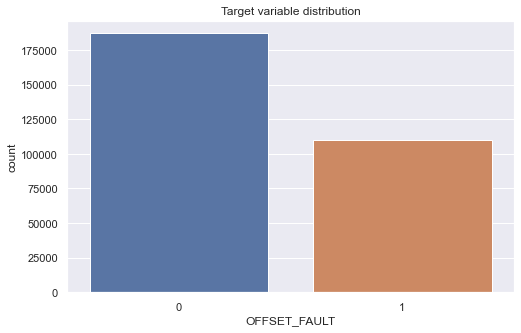

In [216]:
# Target variable distribution
sns.set_style('darkgrid')
plt.figure(figsize=(8, 5))
sns.countplot(x = train_df["OFFSET_FAULT"])
plt.title('Target variable distribution')
plt.show()

### Outliers

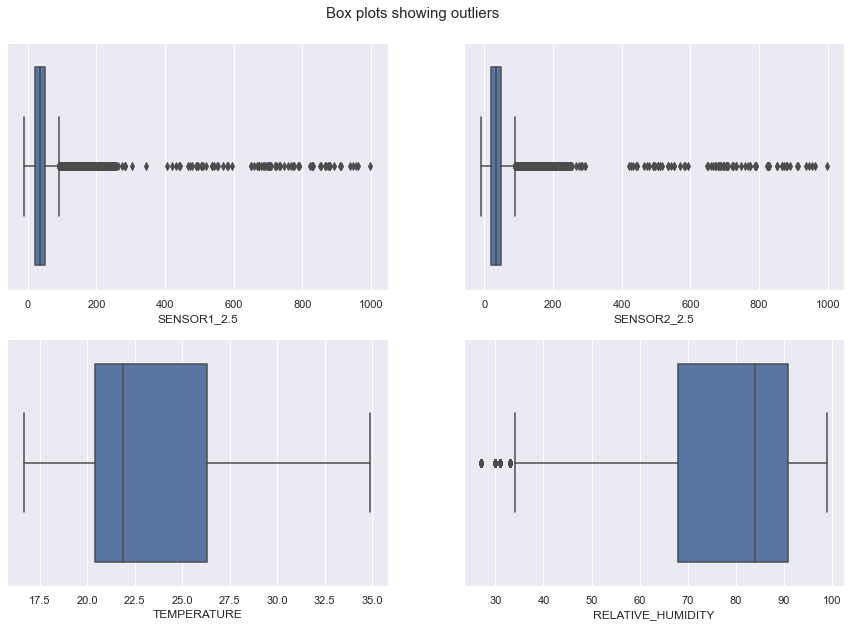

In [217]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), train_df, ['SENSOR1_2.5',	'SENSOR2_2.5',	'TEMPERATURE',	'RELATIVE_HUMIDITY']):
  sns.boxplot(x = train_df[name], ax = ax)

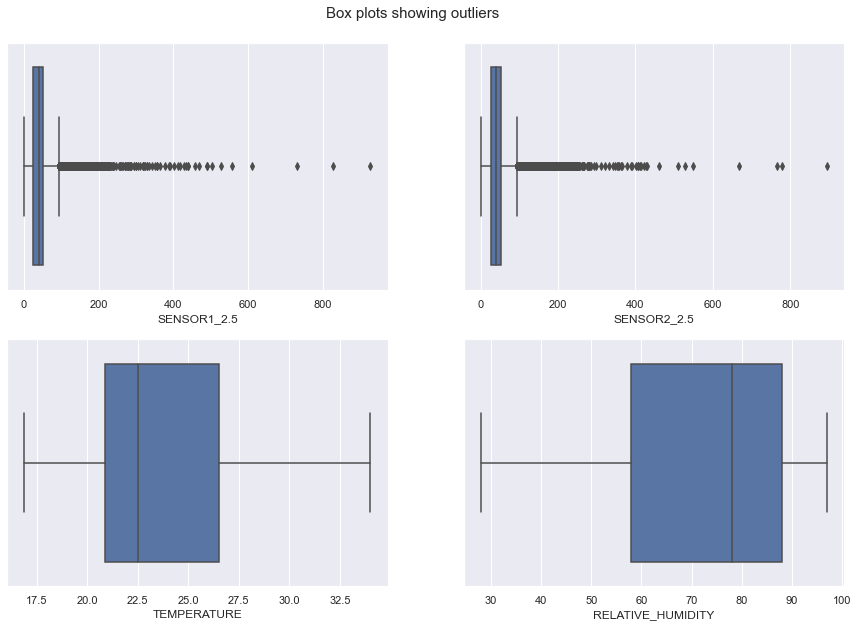

In [218]:
# Plotting boxplots for each of the numerical columns
sns.set_style('darkgrid')
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (15, 10))
fig.suptitle('Box plots showing outliers', y= 0.93, fontsize = 15)

for ax, data, name in zip(axes.flatten(), test_df, ['SENSOR1_2.5',	'SENSOR2_2.5',	'TEMPERATURE',	'RELATIVE_HUMIDITY']):
  sns.boxplot(x = test_df[name], ax = ax)

In [219]:
train_df.columns, test_df.columns

(Index(['ID', 'DATETIME', 'SENSOR1_2.5', 'SENSOR2_2.5', 'TEMPERATURE',
        'RELATIVE_HUMIDITY', 'OFFSET_FAULT', 'YEAR', 'MONTH', 'DAY', 'HOUR',
        'DAY_OF_WEEK', 'HOUR_OF_WEEK'],
       dtype='object'),
 Index(['ID', 'DATETIME', 'SENSOR1_2.5', 'SENSOR2_2.5', 'TEMPERATURE',
        'RELATIVE_HUMIDITY', 'YEAR', 'MONTH', 'DAY', 'HOUR', 'DAY_OF_WEEK',
        'HOUR_OF_WEEK'],
       dtype='object'))

### Feature Correlation

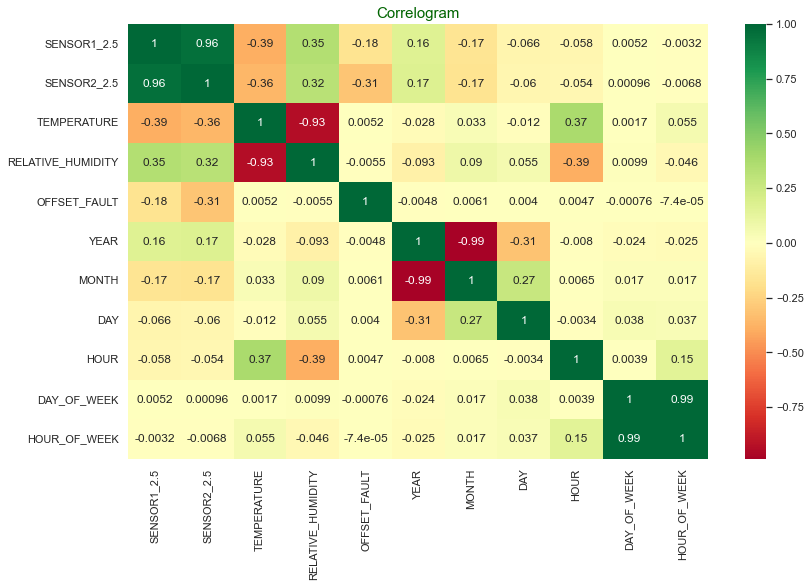

In [220]:
#Quantify correlations
corr = train_df.corr()
plt.figure(figsize = (13, 8))
sns.heatmap(corr, cmap='RdYlGn', annot = True, center = 0)
plt.title('Correlogram', fontsize = 15, color = 'darkgreen')
plt.show()

# 2. Feature Engineering

### Convert Data types to appropriate formats

In [221]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127361 entries, 0 to 127360
Data columns (total 12 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   ID                 127361 non-null  object        
 1   DATETIME           127361 non-null  datetime64[ns]
 2   SENSOR1_2.5        127361 non-null  float64       
 3   SENSOR2_2.5        127361 non-null  float64       
 4   TEMPERATURE        39271 non-null   float64       
 5   RELATIVE_HUMIDITY  39271 non-null   float64       
 6   YEAR               127361 non-null  int64         
 7   MONTH              127361 non-null  int64         
 8   DAY                127361 non-null  int64         
 9   HOUR               127361 non-null  int64         
 10  DAY_OF_WEEK        127361 non-null  int64         
 11  HOUR_OF_WEEK       127361 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 11.7+ MB


### Dealing with Null values

In [222]:
train_df= train_df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)
test_df= test_df.dropna(axis = 0, how ='any', thresh = None, subset = None, inplace=False)


In [223]:
test_df.isnull().sum()

ID                   0
DATETIME             0
SENSOR1_2.5          0
SENSOR2_2.5          0
TEMPERATURE          0
RELATIVE_HUMIDITY    0
YEAR                 0
MONTH                0
DAY                  0
HOUR                 0
DAY_OF_WEEK          0
HOUR_OF_WEEK         0
dtype: int64

drop the datetime and id columns

In [224]:
#drop the datetime and id columns
train_df1 = train_df.drop(['ID', 'DATETIME'], axis = 1)
test_df1 = test_df.drop(['ID', 'DATETIME'], axis = 1)
test_df1.columns

Index(['SENSOR1_2.5', 'SENSOR2_2.5', 'TEMPERATURE', 'RELATIVE_HUMIDITY',
       'YEAR', 'MONTH', 'DAY', 'HOUR', 'DAY_OF_WEEK', 'HOUR_OF_WEEK'],
      dtype='object')

### Dealing with outliers

In [225]:
# split data into predictors and response
train_df2 = train_df1.drop('OFFSET_FAULT', axis=1)


In [226]:
# demonstrate data standardization with sklearn
from sklearn.preprocessing import StandardScaler
# create scaler
scaler = StandardScaler()
# fit and transform in one step
standardized = scaler.fit_transform(train_df2)
# convert the scaled predictor values into a dataframe
train_df3 = pd.DataFrame(standardized,columns=train_df2.columns)
train_df3.head()

,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,HOUR_OF_WEEK
0,0.408344,0.389972,-1.541598,1.175348,-0.512412,0.457146,-1.480885,-1.054724,-0.500162,-0.645040
1,-0.197635,-0.171258,0.436566,-0.244350,-0.512412,0.457146,-0.906539,0.954310,-1.495324,-1.341841
2,-0.759557,-0.515934,0.410537,-0.244350,-0.512412,0.457146,-1.021408,-0.337212,1.490163,1.424869
3,-0.751864,-0.795156,0.410537,-0.582373,1.951554,-1.926719,-1.710624,0.954310,0.992582,1.117457
4,-0.090986,-0.123560,-0.630602,0.702115,-0.512412,0.457146,-1.251147,1.528319,0.495001,0.707574


In [227]:
scaler = StandardScaler()
# fit and transform in one step
standardized = scaler.fit_transform(test_df1)
# convert the scaled predictor values into a dataframe
test_df2 = pd.DataFrame(standardized,columns=test_df1.columns)
test_df2.head()

,SENSOR1_2.5,SENSOR2_2.5,TEMPERATURE,RELATIVE_HUMIDITY,YEAR,MONTH,DAY,HOUR,DAY_OF_WEEK,HOUR_OF_WEEK
0,1.030713,1.764043,-0.398291,-0.896976,0.0,-0.835191,0.858232,-0.513594,0.555191,0.478669
1,10.600473,9.055564,1.185383,-0.509772,0.0,-0.835191,0.530164,0.803478,-1.538324,-1.418627
2,0.140848,0.791735,-0.559342,0.541209,0.0,-0.835191,1.104283,-0.659935,-1.538324,-1.636708
3,0.336373,-0.175857,-0.264081,0.430580,0.0,-0.835191,1.104283,-1.684325,-1.538324,-1.789364
4,-0.284080,-0.465066,-0.935129,0.873098,0.0,1.197330,-1.356225,-1.537984,-1.014945,-1.244163


# 3. Modelling

In [228]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

X = train_df3
y = train_df1.OFFSET_FAULT

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Instantiating the model
clf = RandomForestClassifier(max_depth = 3, random_state = 0)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Measuring the accuracy of the model
print(f'Accuracy score: {accuracy_score(y_test, y_pred)}')
print('\n')
print(f'{classification_report(y_test, y_pred)}')

Accuracy score: 0.7317897350137061


              precision    recall  f1-score   support

           0       0.71      0.96      0.82     36634
           1       0.84      0.34      0.48     21369

    accuracy                           0.73     58003
   macro avg       0.77      0.65      0.65     58003
weighted avg       0.76      0.73      0.69     58003



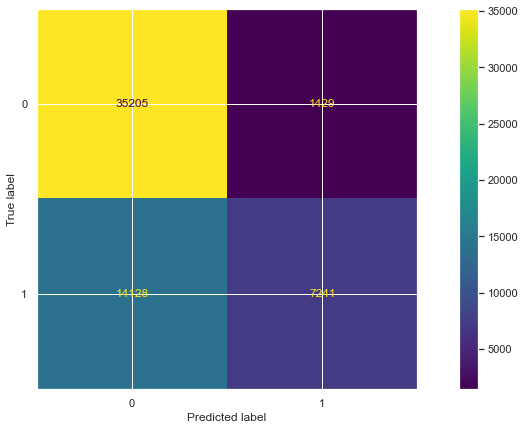

In [229]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
fig, ax = plt.subplots(figsize=(15,7))
disp.plot(ax=ax)
plt.show()

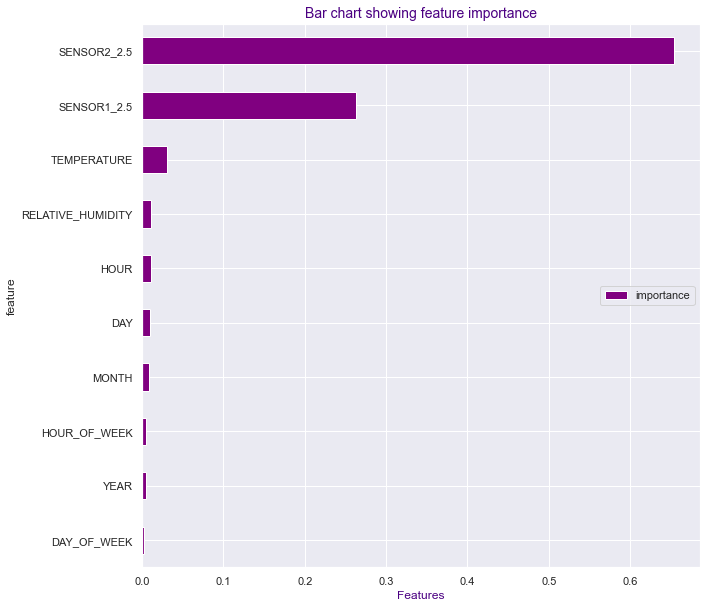

In [230]:
# Feature importance
impo_df = pd.DataFrame({'feature': X.columns, 'importance': clf.feature_importances_}).set_index('feature').sort_values(by = 'importance', ascending = False)
impo_df = impo_df[:12].sort_values(by = 'importance', ascending = True)
impo_df.plot(kind = 'barh', figsize = (10, 10), color = 'purple')
plt.legend(loc = 'center right')
plt.title('Bar chart showing feature importance', color = 'indigo', fontsize = 14)
plt.xlabel('Features', fontsize = 12, color = 'indigo')
plt.show()

In [231]:
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate a DecisionTreeClassifier 'dt' with a maximum depth of 6
dt = DecisionTreeClassifier(max_depth=6, random_state=42)

# Fit dt to the training set
dt.fit(X_train, y_train)

# Predict test set labels
y_pred = dt.predict(X_test)
print(y_pred[0:5])

[0 1 1 0 1]


In [232]:
# Predict test set labels
y_pred = dt.predict(X_test)

# Compute test set accuracy  
acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.80


In [233]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=42)

# Fit dt_entropy to the training set
dt_entropy.fit(X_train,y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Accuracy achieved by using entropy: ', accuracy_entropy)


Accuracy achieved by using entropy:  0.8311811458028033
